### ENSIMAG – Grenoble INP – UGA - Academic year 2024-2025
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2025-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Alexandre Wendling -- `alexandre.wendling@univ-grenoble-alpes.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [22]:
import numpy as np
import pandas as pd

In [23]:

df = pd.read_csv("prostate.data", sep="\t")

df = df.drop(columns=['Unnamed: 0', 'train'])

df['intercept'] = 1

df.columns 

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa', 'intercept'],
      dtype='object')

**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.


**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

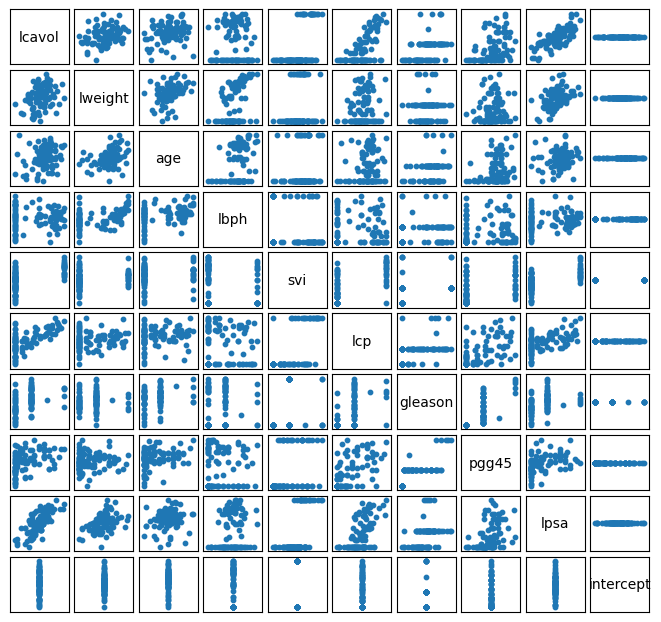

In [24]:
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

Based on this figure, the predictor variables most correlated with `lcavol` are `lpsa` and `lcp`. Furthermore, the categorical predictors are `gleason` and `svi` while the other predictors are  numerical.

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

The Pearson correlation coefficient $r$ between the vectors $X$ and $Y$ is given by the following formula.

$r = \dfrac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}$

C:\Users\dev\AppData\Local\Temp\ipykernel_18092\1555242988.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return num / den


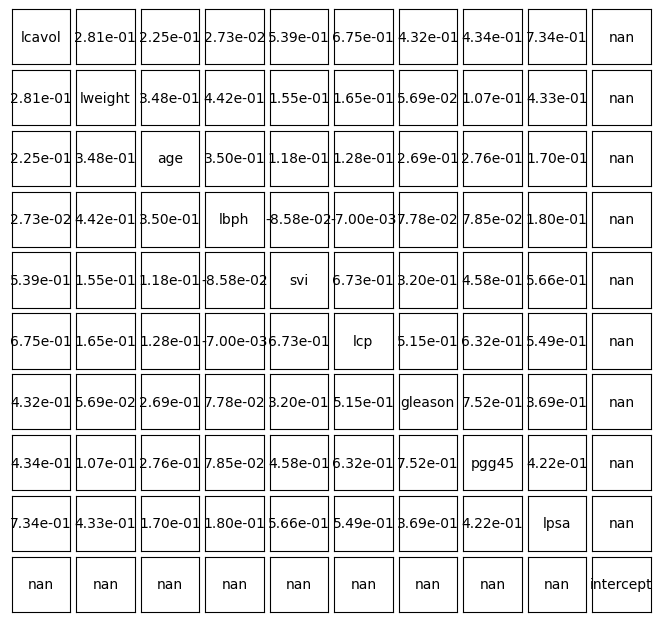

             lcavol   lweight       age      lbph       svi       lcp  \
lcavol     1.000000  0.280521  0.225000  0.027350  0.538845  0.675310   
lweight    0.280521  1.000000  0.347969  0.442264  0.155385  0.164537   
age        0.225000  0.347969  1.000000  0.350186  0.117658  0.127668   
lbph       0.027350  0.442264  0.350186  1.000000 -0.085843 -0.006999   
svi        0.538845  0.155385  0.117658 -0.085843  1.000000  0.673111   
lcp        0.675310  0.164537  0.127668 -0.006999  0.673111  1.000000   
gleason    0.432417  0.056882  0.268892  0.077820  0.320412  0.514830   
pgg45      0.433652  0.107354  0.276112  0.078460  0.457648  0.631528   
lpsa       0.734460  0.433319  0.169593  0.179809  0.566218  0.548813   
intercept       NaN       NaN       NaN       NaN       NaN       NaN   

            gleason     pgg45      lpsa  intercept  
lcavol     0.432417  0.433652  0.734460        NaN  
lweight    0.056882  0.107354  0.433319        NaN  
age        0.268892  0.276112  0.1695

In [25]:
def correlation(x, y):
    num = ((x - x.mean()) * (y - y.mean())).sum()

    den = np.sqrt(np.sum((x - x.mean())**2) * np.sum((y - y.mean())**2))
    return num / den


def pairplotv2(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                corr = correlation(np.array(df[i_name]), np.array(df[j_name]))
                i_name = f"{corr:.2e}"
                
            
            axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplotv2(df)
plt.show()

print(df.corr())

We can note that the data from `df.corr()` and the `pairplotv2()` are similar.

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with


**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

$Y = \beta_0 + \sum_{i=1}^{p} \beta_i X_i + \sum_{j=1}^{q} \gamma_j Z_j + \varepsilon$

$X_i$ represents the i-th numerical parameters
$Z_j$ represents the j-th dummy variable related to a categorical predictor

For categorical variables with $k$ levels, we introduce $k−1$ dummy variables. If a categorical variable has three categories A, B and C. We introduce :

$Z_1 =
\begin{cases} 
1 & \text{if the category of the predictor is "A"} \\
0 & \text{otherwise}
\end{cases}$

$Z_2 =
\begin{cases} 
1 & \text{if the category of the predictor is "B"} \\
0 & \text{otherwise}
\end{cases}$

In [26]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:


- Why did we fix a `dtype` in `pd.get_dummies`?

By fixing the `dtype`, we ensure that all columns are compatible with the regression model's requirements.

- Why did we drop two columns after the encoding?

For each categorical feature, we do not need all one-hot columns, because we can deduce the value of the last column from the others (see example above).

- Why did we add a column of ones to the dataframe?

To allow the estimation of the $\beta_0$ in the linear regression model.

In [28]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:


Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`.

The coefficient `svi_1` represents the difference in `lcavol` between individuals with $svi = 1$ and the reference group ($svi = 0$), while keeping all other predictors constant.

The coefficient `gleason_7`, `gleason_8` and `gleason_9` represent the difference between the individuals with respectively $gleason = 7$, $gleason = 8$ and $gleason = 9$ with the $gleason = 6$ individuals which compose the reference group.

- What would have happened in the regression if we did not do the one-hot encoding from above?

Without one-hot encoding, the categorical predictors would be treated as numerical variables, implying an arbitrary numerical interpretation of the categories. This could lead to misleading results, as the model would assume an implicit order between categories and a linear relationship between them. Consequently, the estimated effects would depend on the arbitrary numerical values assigned to the categories, potentially distorting the analysis.

- Comment the overall results of the regression as well.

$R^2 = 0.686$ : the model explains $68.6$ % of the variance.

Adjusted $R^2 = 0.650$ : this takes into account the number of predictors and the value of $65.0$ % suggests that the model stays accurate even after accounting of this information.

Furthermore, the p-values of `lpsa` and `lcp`, rounded up to $0.001$ (since $0.000$ is not meaningful), show that these two predictors are the most statistically significant. Additionally, `age` and `pgg45`, with a relatively low p-value (<$0.05$), show that they are also quite significant.

In [7]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           9.05e-18
Time:                        10:34:44   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [9]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
intercept,-3.145013,0.331705
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911


The predictors `age`, `lcp`, and `lpsa` are the only ones with confidence intervals that do not include $0$, indicating they are the most statistically significant. In contrast, the other predictors have uncertain effects on `lcavol`.

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

The `lpsa` variable has a very low $p-value$ meaning that it significantly contributes to predicting the `lcavol` variable.

In [10]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
intercept    1.113676e-01
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
dtype: float64

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [11]:
def calculate_parameters(x, y):
    result = np.linalg.inv(np.dot(np.transpose(x), x))

    result = np.dot(result, np.transpose(x))

    return np.dot(result, y)

By using the `numpy.linalg.solve` function, we can find the vector $β$ by solving the system $(X^TX)β=X^Ty$ instead of calculating it with its formula : β=(X^TX)^{-1}X^Ty. This allows to calculate $β$ without having to calculate the inverse of $(X^TX)$.
We would have the following function.

In [12]:
def calculate_parameters_v2(x, y):
    return np.linalg.solve(x.T @ x, x.T @ y)

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

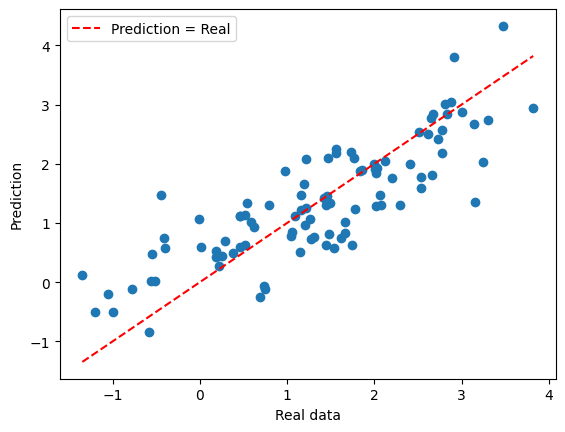

In [13]:
pred = results.predict(X)

plt.scatter(y, pred)
plt.xlabel('Real data')
plt.ylabel('Prediction')

x_vals = np.linspace(min(y), max(y), 100)  # Générer des points entre les min/max de y
plt.plot(x_vals, x_vals, color="red", linestyle="--", label="Prediction = Real")

plt.legend()
plt.show()

The red line plotted above represents what we should get with a theoretical perfect model. The closer the point are to this line the smaller is the error between the predicted value and the actual value of `lcavol` for the corresponding data sample.

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

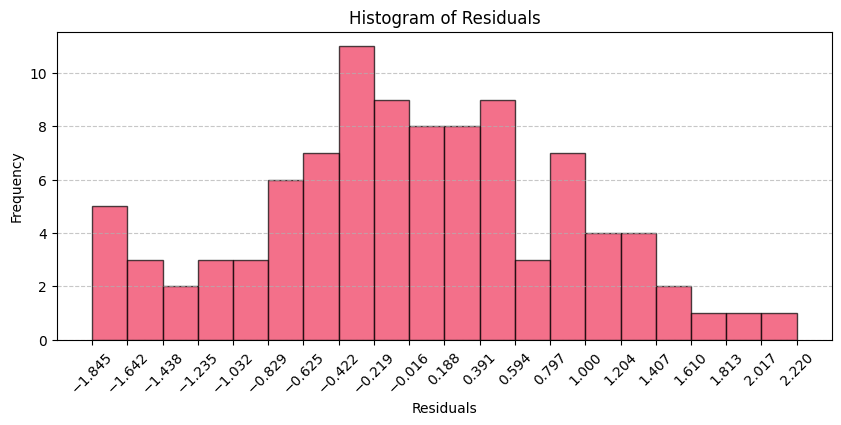

c:\Users\dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 600x600 with 0 Axes>

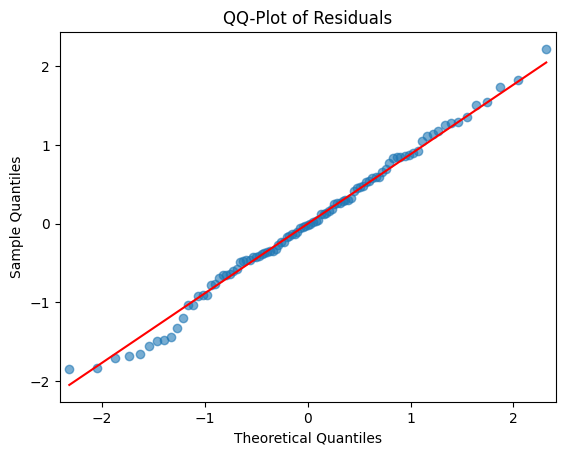

Residual Sum of Squares (RSS): 75.6532


In [19]:
resid = y - pred

def plot_histogram_qqplot(resid):
    bins = np.histogram_bin_edges(resid, bins=20)
    plt.figure(figsize=(10, 4))
    plt.hist(resid, bins=bins, color='#EE3459', alpha=0.7, edgecolor='black', rwidth=1.0)

    plt.xticks(bins, rotation=45)

    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    plt.figure(figsize=(6, 6))
    sm.qqplot(resid, line='s', alpha=0.6, color='#008B8B')
    plt.title("QQ-Plot of Residuals")
    plt.show()

    RSS = np.sum(resid ** 2)
    print(f"Residual Sum of Squares (RSS): {RSS:.4f}")

plot_histogram_qqplot(resid)



Given the histogram above, it is reasonable to think the residuals follow a centered normal distribution. Finally, the QQ-Plot seems to reinforce this hypothesis.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

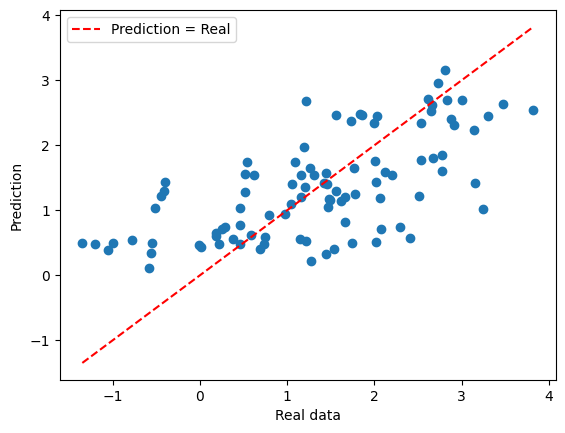

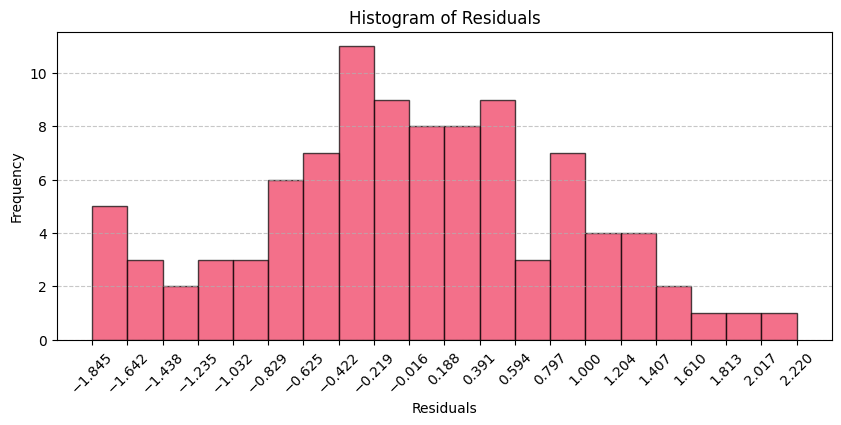

c:\Users\dev\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 600x600 with 0 Axes>

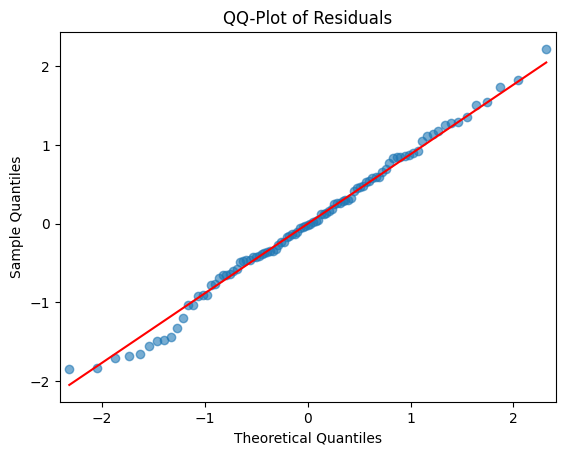

Residual Sum of Squares (RSS): 75.6532


In [ ]:
X = df_enc.drop(columns=['lcavol', 'lpsa', 'lcp'])

model = sm.OLS(y, X)
results = model.fit()

pred = results.predict(X)

plt.scatter(y, pred)
plt.xlabel('Real data')
plt.ylabel('Prediction')

x_vals = np.linspace(min(y), max(y), 100)
plt.plot(x_vals, x_vals, color="red", linestyle="--", label="Prediction = Real")

plt.legend()
plt.show()

plot_histogram_qqplot(resid)

According to the histogram and the qq-plot of the residuals. The new model seems to have residuals following a standard normal distribution even without using the `lpsa` and `lcp` predictors. But by looking at the plot of the predicted data as a function af the actual data, it seems that this model suffers from regression to the mean meaning that it tends to overestimate low values and underestimate high values. In conclusion, even if the residuals follow the desired distribution this new model is not good enough to predict the value of `lcavol`.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [ ]:
import itertools

X3 = df.drop(columns=['lcavol'])

X3.head(10)

,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,intercept
0,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,1
1,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,1
2,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,1
3,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,1
4,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,1
5,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,1
6,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,1
7,3.539509,58,1.536867,0,-1.386294,6,0,0.854415,1
8,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,1
9,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,1


In [ ]:
min_rss = 1000
for i in itertools.combinations(range(0, 8), 2):
    x= X3.iloc[:, list(i)]
    model = sm.OLS(y, x)
    results = model.fit()
    if results.ssr < min_rss : 
        min_rss = results.ssr
        min_factor = i

print(min_rss)
print(min_factor)

47.37769725737479
(4, 7)


In [ ]:

subset_res = []
best_com = []

for k in range(1, 9):    
    min_rss = 1000
    for i in itertools.combinations(range(0, 8), k):
        x= X3.iloc[:, list(i)]
        model = sm.OLS(y, x)
        results = model.fit()
        if results.ssr < min_rss : 
            min_rss = results.ssr
            min_factor = i
    subset_res.append(min_rss)
    best_com.append(min_factor)
    print("best result for k = ", k)
    print(min_rss)
    print(min_factor)
print(best_com)

best result for k =  1
65.8553927065057
(7,)
best result for k =  2
47.37769725737479
(4, 7)
best result for k =  3
46.74212812068931
(2, 4, 7)
best result for k =  4
46.238681682682724
(0, 1, 4, 7)
best result for k =  5
45.58362658362049
(0, 1, 4, 6, 7)
best result for k =  6
45.13812643002112
(0, 1, 2, 4, 6, 7)
best result for k =  7
44.89189346615176
(0, 1, 2, 3, 4, 6, 7)
best result for k =  8
44.88041067262605
(0, 1, 2, 3, 4, 5, 6, 7)
[(7,), (4, 7), (2, 4, 7), (0, 1, 4, 7), (0, 1, 4, 6, 7), (0, 1, 2, 4, 6, 7), (0, 1, 2, 3, 4, 6, 7), (0, 1, 2, 3, 4, 5, 6, 7)]


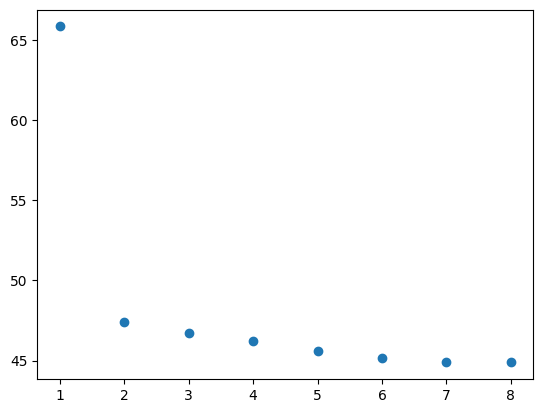

In [ ]:
plt.scatter(range(1, 9), subset_res)

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 



In [ ]:
from sklearn.model_selection import train_test_split

merr_train = []
merr_test = []

for i in best_com:
    x= X3.iloc[:, list(i)]
    #print(x.columns)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .7)

    model = sm.OLS(y_train, x_train)
    results = model.fit()

    merr_train.append(np.mean(np.square(results.predict(x_train) - y_train)))
    merr_test.append((np.mean(np.square(results.predict(x_test) - y_test))))
    



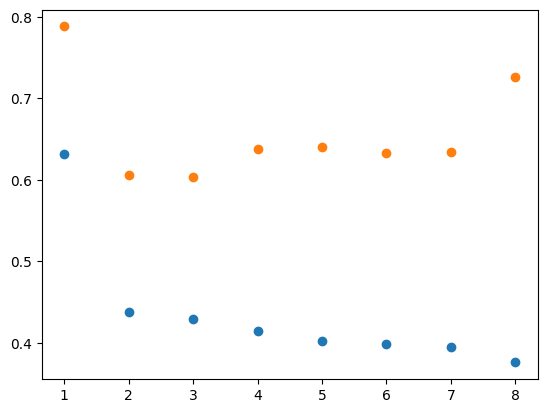

In [ ]:
plt.scatter(range(1, 9), merr_train)
plt.scatter(range(1, 9), merr_test)

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.



**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.